In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as ks
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Bidirectional, Lambda, Input
from tensorflow.keras.models import Model
plt.style.use('default')
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('sp500.csv')
print(df.shape)
df.head()

(2790, 5)


,Date,Close,Open,High,Low
0,2021/8/3,4423.15,4392.74,4423.79,4373.00
1,2021/8/2,4387.11,4406.86,4422.18,4384.81
2,2021/7/30,4395.26,4395.12,4412.25,4389.65
3,2021/7/29,4419.15,4403.59,4429.97,4403.59
4,2021/7/28,4400.65,4402.95,4415.47,4387.01


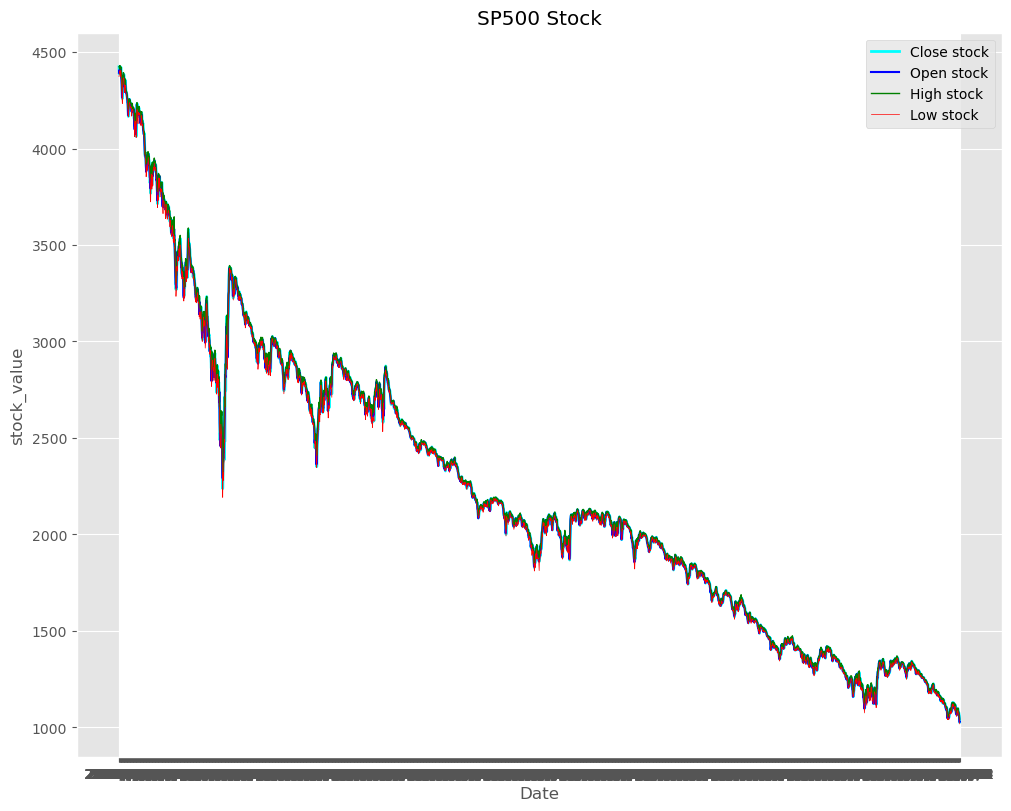

In [5]:
plt.figure(figsize=(10, 8), constrained_layout=True)
c = ['cyan', 'blue', 'green', 'red']
y = ['Close', 'Open', 'High', 'Low']
l = 2.0
for j, c in zip(y, c):
  plt.plot(df['Date'], df[j], color=c, linewidth=l, label=f'{j} stock')
  plt.title('SP500 Stock')
  plt.xlabel('Date')
  plt.ylabel('stock_value')
  plt.legend()
  l -=0.5

plt.show()

In [6]:
from PyEMD import CEEMDAN, Visualisation

In [7]:
close = df[['Close']].values

In [9]:
close

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [640.809998],
       [650.570007],
       [780.      ]])

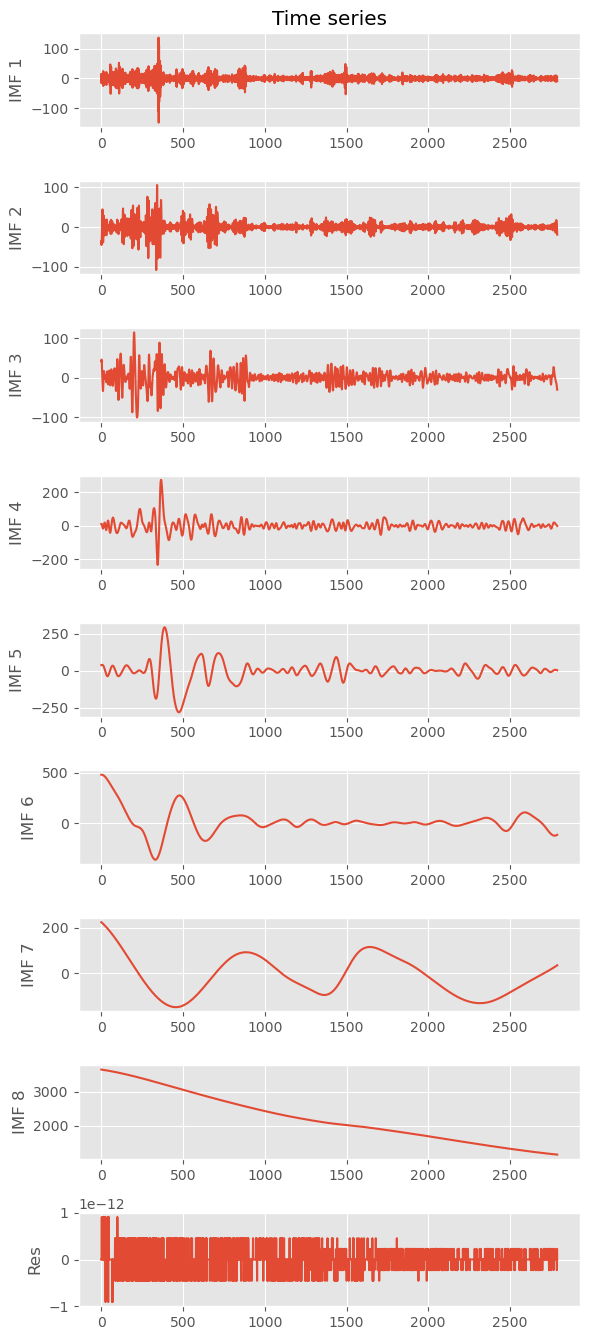

In [8]:
ceemdan = CEEMDAN()
ceemdan.ceemdan(close.reshape(-1))
imfs_close, res_close = ceemdan.get_imfs_and_residue()

t = np.arange(0, 2790, 1)
vis = Visualisation()
vis.plot_imfs(imfs=imfs_close, residue=res_close, t=t, include_residue=True)
# vis.plot_instant_freq(t, imfs=imfs)
vis.show()

In [7]:
imfs_close[0]

array([  1.11744991,   1.06726636,   0.51836037, ...,  21.82756114,
       -26.33055902,  28.52749098])

In [9]:
# 取之前X_lag个数据来预测下一个数据
def time_slice(data,X_lag):
    sample = []
    label = []
    for k in range(len(data) - X_lag - 1):
        t = k + X_lag
        sample.append(data[k:t])
        label.append(data[t + 1])
    return sample,label


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import time

In [8]:
def implement_BP(X_train, y_train):
    param_grid = {'hidden_layer_sizes': [(3,), (10,), (30,), (9,), (20,)], 'learning_rate_init': [0.001, 0.1, 0.2, 0.3, 0.01],
                  'max_iter': [8000]}
    model = MLPRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    print(grid_search.best_estimator_)
    print(grid_search.best_params_)
    
#     model = MLPRegressor(hidden_layer_sizes=(10,), random_state=10, learning_rate_init=0.1)  # BP神经网络回归模型
#     model.fit(X_train,y_train)  # 训练模型
    
    return grid_search.best_estimator_

In [11]:
def split(sample, label, test_ratio):
    length = len(label)
    train_len = round((1-test_ratio)*length)
    test_len = round(test_ratio*length)
#     print(test_len)
#     print(train_len)
    X_train = sample[0:train_len]
    X_test = sample[train_len+1:length]
    y_train = label[0:train_len]
    y_test = label[train_len+1:length]

#     X_test = sample[200:test_len+200]
#     X_train = sample[0:200]
#     print(len(X_train))
#     for i in range(test_len+200,length):
#         X_train.append(sample[i])
    
#     y_test = label[200:test_len+200]
#     y_train = label[0:200]
#     for j in range(test_len+200,length):
#         y_train.append(label[j])
    
    return X_train, X_test, y_train, y_test

In [12]:
sample,label = time_slice(imfs_close[0],30)
X_train, X_test, y_train, y_test = split(sample, label, 0.2)

In [13]:
print(len(X_test))
print(len(X_train))

551
2207


In [15]:
print(X_train)
print(y_train)

[array([ 14.85516705, -15.97904664,  -7.44179416,  13.97301203,
        -7.76380371, -10.27738087,  10.59042871,   6.97595221,
       -15.78824421,  15.77537005,  20.55493648, -24.81518517,
        24.79439292,  21.13246468,  -0.99265505, -22.5272666 ,
         6.1644908 ,  17.8919875 , -16.14216508,  14.05600153,
       -10.84132095,   8.58163395,  -2.78309552,  -5.34792538,
         1.32771589,   5.34075782,   0.70929379,  -5.38650211,
       -14.74931057,  14.19143348]), array([-15.97904664,  -7.44179416,  13.97301203,  -7.76380371,
       -10.27738087,  10.59042871,   6.97595221, -15.78824421,
        15.77537005,  20.55493648, -24.81518517,  24.79439292,
        21.13246468,  -0.99265505, -22.5272666 ,   6.1644908 ,
        17.8919875 , -16.14216508,  14.05600153, -10.84132095,
         8.58163395,  -2.78309552,  -5.34792538,   1.32771589,
         5.34075782,   0.70929379,  -5.38650211, -14.74931057,
        14.19143348,  21.8134967 ]), array([ -7.44179416,  13.97301203,  -7.7638

In [23]:
i = 1
svr = []
prediction = []
actual = []

for imf in imfs_close:
#     print('-'*45)
#     print('This is  ' + str(i)  + '  time(s)')
#     print('*'*45)
    
    # 生成time series dataset
    sample,label = time_slice(imf,30)
    
    # 数据集划分
#     X_train, X_test, y_train, y_test = train_test_split(sample, label, test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = split(sample, label, 0.2)
    tmp = implement_BP(X_train, y_train)
    
    svr.append(tmp)
    actual.append(y_test)
    
    pre_tmp = tmp.predict(X_test)
    prediction.append(pre_tmp)
    
    i=i+1

MLPRegressor(hidden_layer_sizes=(3,), max_iter=8000)
{'hidden_layer_sizes': (3,), 'learning_rate_init': 0.001, 'max_iter': 8000}
MLPRegressor(hidden_layer_sizes=(3,), learning_rate_init=0.1, max_iter=8000)
{'hidden_layer_sizes': (3,), 'learning_rate_init': 0.1, 'max_iter': 8000}
MLPRegressor(hidden_layer_sizes=(9,), max_iter=8000)
{'hidden_layer_sizes': (9,), 'learning_rate_init': 0.001, 'max_iter': 8000}


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(3,), max_iter=8000)
{'hidden_layer_sizes': (3,), 'learning_rate_init': 0.001, 'max_iter': 8000}


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(9,), max_iter=8000)
{'hidden_layer_sizes': (9,), 'learning_rate_init': 0.001, 'max_iter': 8000}


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(30,), max_iter=8000)
{'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'max_iter': 8000}


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(30,), max_iter=8000)
{'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'max_iter': 8000}


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10,), max_iter=8000)
{'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001, 'max_iter': 8000}


In [14]:
prediction

[array([ -0.04455633,  -0.04455633,  -1.85720222,  -0.04455633,
         -0.04455633,  -2.10088535,  -0.11291446,  -1.68501499,
         -0.04455633,   3.48829786,  -3.71940181,  -1.40929059,
          3.01953556,  -4.1668772 ,  -0.04455633,   4.58075416,
         -2.78083092,  -7.15229398,  -2.0018958 ,   3.811278  ,
         -2.32203908,  -0.04455633,   0.17695729,  -0.04455633,
         -0.68108718,   1.00795782,  -0.04455633,  -4.75440818,
          0.22693341,   2.81730565,  -3.21859868,  -0.04455633,
          1.41789548,  -0.04455633,   1.21362496,  -0.82624397,
         -0.04455633,  -0.04455633,  -4.11405518,  -0.04455633,
         -0.26266743,  -1.8305043 ,  -2.44822152,  -0.04455633,
          0.78055518,   2.71844576,  -0.04455633,  -0.80967472,
          0.69591775,  -0.04455633,  -0.04455633,  -1.30561261,
         -0.04455633,  -0.04455633,   0.28767882,  -0.04455633,
         -0.04455633,  -0.04455633,  -1.27392727,   2.02850457,
         -3.01650578,  -0.04455633,   2.

In [24]:
mean_pre = []

for i in range(0,len(prediction[0])):
    sum = 0
    for j in range(0,len(prediction)):
        sum = sum + prediction[j][i]
    
    mean = sum/len(prediction)
    mean_pre.append(mean)
        
mean_pre        

[177.53992581219757,
 177.52784730323296,
 176.66229156775128,
 174.68579950469442,
 174.4123152857581,
 175.3573313652484,
 175.00250029885615,
 175.98226817783575,
 176.3415032739996,
 176.41612857067776,
 176.08179156178733,
 175.57711245607368,
 175.7112550602844,
 176.57915665906364,
 176.74286788598135,
 176.76628074494022,
 176.160811039148,
 175.6722877141118,
 174.97492953171678,
 174.87345497622314,
 175.18872379845266,
 175.03123804414446,
 174.7679484042859,
 174.20323805940353,
 172.95528237893458,
 172.12021686921133,
 170.54641918751724,
 170.89897137274107,
 171.49226831501718,
 171.23204118215241,
 170.4270651620169,
 168.9836741762911,
 168.07060352545307,
 169.63789422660096,
 169.3376117922317,
 169.70483016626727,
 170.1165178632611,
 169.8711194476032,
 168.58222006012207,
 167.73999819950475,
 168.38374410530866,
 167.87771839709544,
 168.56807736140095,
 169.20043837171417,
 169.21199924637006,
 168.96346525223566,
 169.6812631752204,
 169.4964681566301,
 169.01

In [25]:
mean_actual = []

for i in range(0,len(actual[0])):
    sum = 0
    for j in range(0,len(actual)):
        sum = sum + actual[j][i]
    
    mean = sum/len(actual)
    mean_actual.append(mean)
        
mean_actual    

[179.74,
 179.015,
 175.43,
 175.6175,
 175.8225,
 174.93499999999997,
 176.31125,
 176.1625,
 176.305,
 176.39125,
 175.26,
 176.68625,
 176.64625000000004,
 177.26625,
 177.27,
 176.93875,
 175.69125,
 175.49125,
 175.51374999999996,
 175.73375,
 175.35,
 175.2775,
 175.16875,
 174.27875000000003,
 173.87375000000003,
 170.625,
 171.8925,
 172.415,
 173.1625,
 173.24625,
 170.00249999999997,
 167.23625,
 167.28875,
 168.815,
 170.3325,
 172.06375,
 171.59750000000003,
 170.45875,
 169.205,
 169.5975,
 166.845,
 167.68125,
 167.68375,
 169.0575,
 169.335,
 170.94749999999996,
 171.7525,
 170.68875,
 170.27,
 166.13,
 166.48125,
 164.99875,
 164.21500000000003,
 166.8775,
 165.68875000000003,
 169.46125,
 169.7475,
 168.0975,
 167.85500000000002,
 166.1375,
 164.36,
 165.5225,
 163.61625,
 165.7075,
 164.37375000000003,
 164.39124999999999,
 160.68750000000003,
 159.7725,
 159.75499999999997,
 163.79125,
 164.16499999999996,
 166.5525,
 164.7275,
 165.085,
 164.8575,
 164.57875,
 164.4

In [26]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("mean_absolute_error:", mean_absolute_error(mean_actual, mean_pre))
print("mean_squared_error:", mean_squared_error(mean_actual, mean_pre))
print("rmse:", sqrt(mean_squared_error(mean_actual, mean_pre)))
print("r2 score:", r2_score(mean_actual, mean_pre))

mean_absolute_error: 0.9482191638625844
mean_squared_error: 1.6455476189980003
rmse: 1.2827890001859232
r2 score: 0.9880179414696965


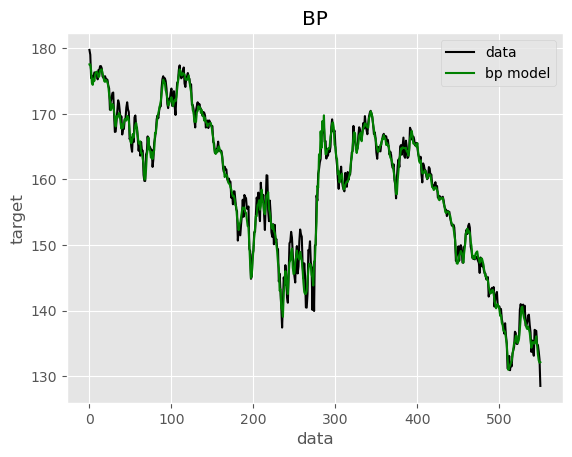

In [27]:
plt.plot(mean_actual,c='k',label='data')
plt.plot(mean_pre,c='g',label='bp model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('BP')
plt.legend()
plt.show()


In [28]:
# 傻瓜算法
stupid_actual = mean_actual
stupid_predict = [stupid_actual[0]]
stupid_predict[1:len(stupid_actual)] = stupid_actual[0:len(stupid_actual)-1]
print(len(stupid_actual))
print(len(stupid_predict))
print(stupid_actual)
print(stupid_predict)

551
551
[179.74, 179.015, 175.43, 175.6175, 175.8225, 174.93499999999997, 176.31125, 176.1625, 176.305, 176.39125, 175.26, 176.68625, 176.64625000000004, 177.26625, 177.27, 176.93875, 175.69125, 175.49125, 175.51374999999996, 175.73375, 175.35, 175.2775, 175.16875, 174.27875000000003, 173.87375000000003, 170.625, 171.8925, 172.415, 173.1625, 173.24625, 170.00249999999997, 167.23625, 167.28875, 168.815, 170.3325, 172.06375, 171.59750000000003, 170.45875, 169.205, 169.5975, 166.845, 167.68125, 167.68375, 169.0575, 169.335, 170.94749999999996, 171.7525, 170.68875, 170.27, 166.13, 166.48125, 164.99875, 164.21500000000003, 166.8775, 165.68875000000003, 169.46125, 169.7475, 168.0975, 167.85500000000002, 166.1375, 164.36, 165.5225, 163.61625, 165.7075, 164.37375000000003, 164.39124999999999, 160.68750000000003, 159.7725, 159.75499999999997, 163.79125, 164.16499999999996, 166.5525, 164.7275, 165.085, 164.8575, 164.57875, 164.49875, 161.9025, 163.1075, 165.60000000000002, 166.3325, 167.29375000

In [29]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("mean_absolute_error:", mean_absolute_error(stupid_actual, stupid_predict))
print("mean_squared_error:", mean_squared_error(stupid_actual, stupid_predict))
print("rmse:", sqrt(mean_squared_error(stupid_actual, stupid_predict)))
print("r2 score:", r2_score(stupid_actual, stupid_predict))

mean_absolute_error: 1.275739564428313
mean_squared_error: 3.2897476009528197
rmse: 1.8137661373376723
r2 score: 0.9760456957614241


In [30]:
trend_actual = []

for i in range(1, len(mean_actual)):
    tmp = mean_actual[i] - mean_actual[i-1]
    if tmp < 0: # down
        trend_actual.append(2)
    elif tmp > 0: # up
        trend_actual.append(0)
    else:
        trend_actual.append(1)

print(len(trend_actual))
trend_actual

550


[2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,


In [31]:
trend_predict = []

for i in range(1, len(mean_pre)):
    tmp = mean_pre[i] - mean_pre[i-1]
    if tmp < 0: # down
        trend_predict.append(2)
    elif tmp > 0: # up
        trend_predict.append(0)
    else:
        trend_predict.append(1)

trend_predict

[2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,


In [23]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("mean_absolute_error:", mean_absolute_error(trend_actual, trend_predict))
print("mean_squared_error:", mean_squared_error(trend_actual, trend_predict))
print("rmse:", sqrt(mean_squared_error(trend_actual, trend_predict)))
print("r2 score:", r2_score(trend_actual, trend_predict))

mean_absolute_error: 0.6652631578947369
mean_squared_error: 1.3305263157894738
rmse: 1.1534844237307558
r2 score: -0.33067375886524863


In [32]:
same = 0
up = []

for i in range(0, len(trend_actual)):
    if trend_actual[i] == trend_predict[i]:
        same = same + 1
        tmp = abs(mean_actual[i+1]-mean_actual[i])
        up.append(tmp)
        
ratio = same/len(trend_actual)
ratio

0.6563636363636364

In [29]:
up

[0.128749875000004,
 0.5312499999999929,
 0.973751,
 0.3762512500000028,
 0.9287491250000031,
 0.9449996250000012,
 3.125,
 2.674999249999999,
 2.426250374999988,
 2.347499875000004,
 0.8025016249999979,
 1.2049979999999962,
 0.856250750000001,
 1.1412506249999979,
 0.707500500000009,
 0.8412476249999941,
 1.229999625000005,
 0.858749374999995,
 0.011249500000005241,
 1.0749970000000033,
 0.15374762500000116,
 2.08749774999999,
 1.2049979999999962,
 1.084999124999996,
 0.610000625000005,
 0.22875212499999975,
 0.4949988750000003,
 1.1362496249999978,
 0.973751,
 0.9650002499999886,
 0.5074996249999941,
 0.1525001250000031,
 0.125,
 0.613750500000009,
 0.9949988749999861,
 0.8862494999999981,
 0.6149978750000002,
 3.546249375000002,
 0.19625100000001083,
 1.805000249999999,
 1.3337478750000002,
 0.2512512500000028,
 1.617500249999992,
 0.056251500000009,
 1.5824967500000042,
 1.8387488749999932,
 1.7350006249999979,
 0.07749937500000215,
 1.1237487499999972,
 0.3125,
 0.8724976250000083

In [33]:
profit = []

for i in range(0, len(trend_predict)):
    if trend_predict[i] == 2:  # down
        tmp = mean_pre[i]-mean_pre[i+1]
        profit.append(tmp)
    elif trend_predict[i] == 0:
        tmp = mean_pre[i+1]-mean_pre[i]
        profit.append(tmp)
   
print(mean_actual[0])
np.sum(profit)

179.74


425.8334349410283

In [31]:
all_profit = []

for i in range(0, len(trend_predict)):
    if trend_predict[i] == 2:  # down
        tmp = mean_pre[i]-mean_pre[i+1]
        profit.append(tmp)
    elif trend_predict[i] == 0:
        tmp = mean_pre[i+1]-mean_pre[i]
        profit.append(tmp)

353.54625562499996

In [38]:
close[len(close)-550:len(close)]

array([[1432.12],
       [1403.44],
       [1404.94],
       [1406.58],
       [1399.48],
       [1410.49],
       [1409.3 ],
       [1410.44],
       [1411.13],
       [1402.08],
       [1413.49],
       [1413.17],
       [1418.13],
       [1418.16],
       [1415.51],
       [1405.53],
       [1403.93],
       [1404.11],
       [1405.87],
       [1402.8 ],
       [1402.22],
       [1401.35],
       [1394.23],
       [1390.99],
       [1365.  ],
       [1375.14],
       [1379.32],
       [1385.3 ],
       [1385.97],
       [1360.02],
       [1337.89],
       [1338.31],
       [1350.52],
       [1362.66],
       [1376.51],
       [1372.78],
       [1363.67],
       [1353.64],
       [1356.78],
       [1334.76],
       [1341.45],
       [1341.47],
       [1352.46],
       [1354.68],
       [1367.58],
       [1374.02],
       [1365.51],
       [1362.16],
       [1329.04],
       [1331.85],
       [1319.99],
       [1313.72],
       [1335.02],
       [1325.51],
       [1355.69],
       [13

In [36]:
len(tmp)

500